**Ensuring plot visibility in notebook!**

In [1]:
%matplotlib inline

**Relevant imports!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Read the housing dataset into a dataframe.**

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

# Address and Price cols represnts the address and price of a particular house and all other cols with Avg Area as the prefix represnts the suffix value averaged over the entire area in which that particular house is situated.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


**Get the detailed info of the dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical info of the entire dataframe.**

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Plot a pairplot using seaborn.**

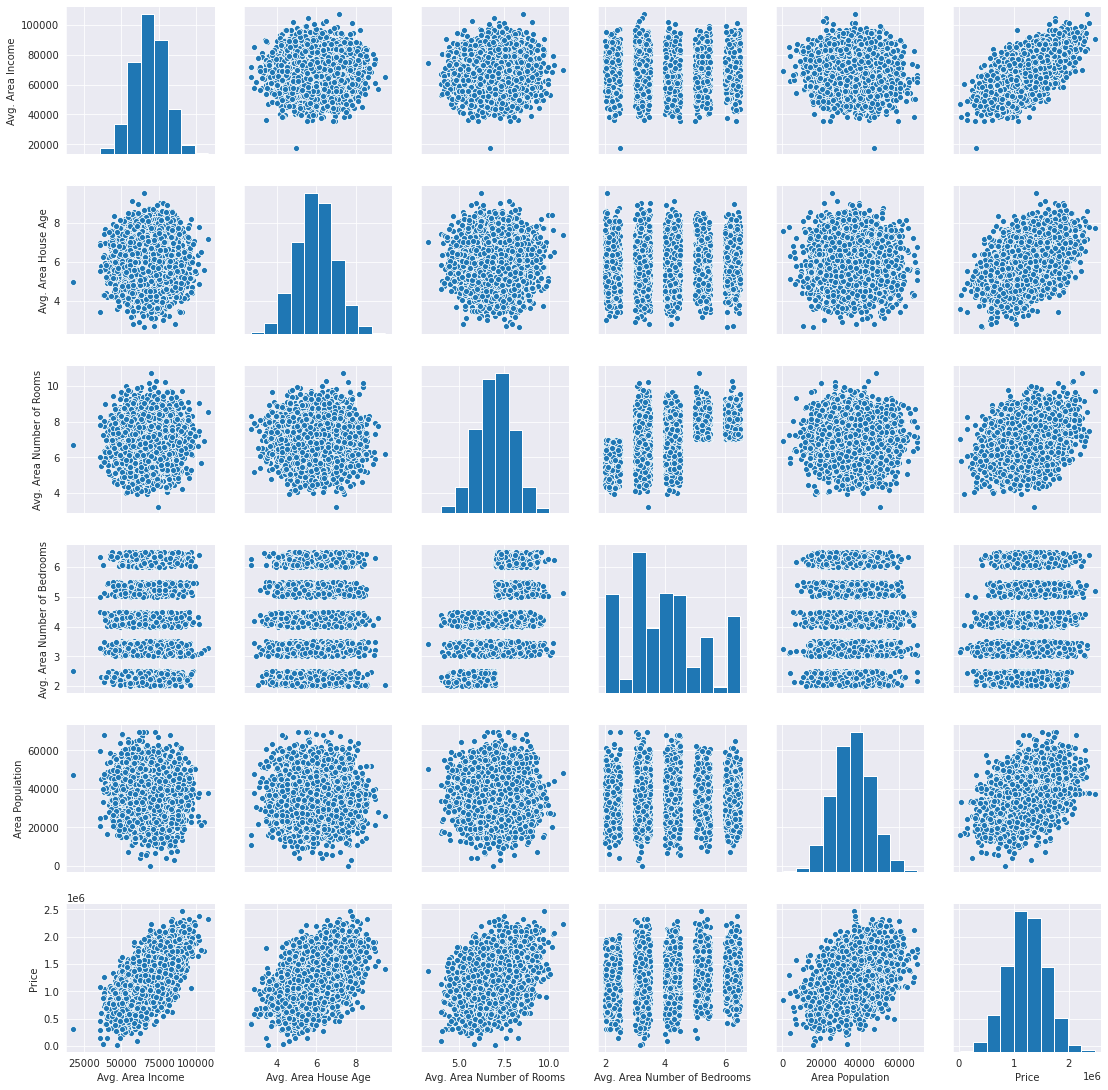

In [6]:
sns.set_style('darkgrid')
sns.pairplot(df)

# Pairplot is the best way to visualize the interrelation amongst all cols in a dataframe containing more number of columns. 
# Conclusions made:-
# Seeing the histograms/distplots we can figure out clearly that all the columns are normally distributed except the Avg Area Number of Bedrooms which seems more of a categorical col which is justifiable as well coz the number of rooms cant be decimals like 2.5 or 4.8 etc so thats the reason of the bars being formed in the scatter plot of that column. 
# Normally distributed - If the graph is approximately bell-shaped and symmetric about the mean it is said to be normally distributed similar to the plots present on the diagonal(Each diagonal plot represnts distplot of an individual column)

**Plot the distribution of the target column i.e, col that is to be predicted.**

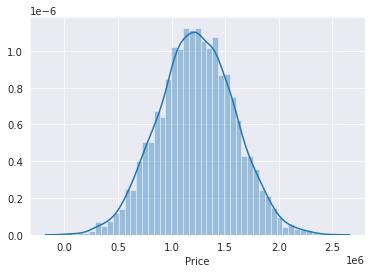

In [7]:
sns.distplot(df['Price'])

# Always try to see the distribution of the target column that is the column for which our model will predict the values. 
# Avg house price lies around 12.5lacs

**Plot a heatmap of the correlation df.**

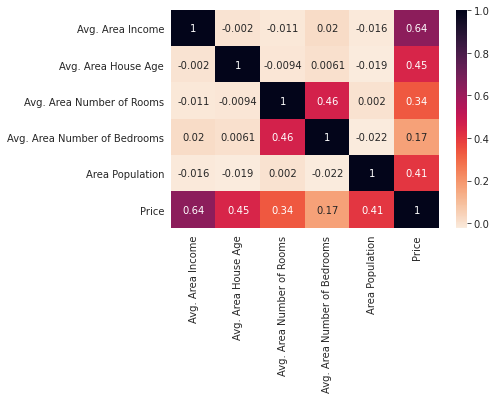

In [8]:
cmap = sns.cm.rocket_r #Used for reversing the cmap
sns.heatmap(df.corr(),annot=True,cmap=cmap)

**Split the data into train and test data.**

In [9]:
X_train, X_test, y_train, y_test=train_test_split(df[df.columns[:-2]],df['Price'],test_size=0.4,random_state=101)

# Since we have to predict the Price values so we need to give that in the plave if y argument in train_test_split. Rest all columns we are taking as features ecveot the Address col which is a String col so cannot be used. 
# random_state is used to preserve the split type i.e, if in future we want the same data in the splits then we cld have by giving the same random_state. Usually split happens randomly so if we do notuse random_state then most likely we will have diff data in the splits from what it was having in the previous model run. 
# test_size=% of total data to be allocated to the test data split.
# X_train and X_test are Dataframes while y_train and y_test are Series.


**Instantiate the LinearRegression model object.**

In [10]:
lm = LinearRegression()

**Train the model with the training data split.**

In [11]:
lm.fit(X_train,y_train)

# It is an inplace operation.

LinearRegression()

**Print the intercept of the model built.**

In [12]:
print(lm.intercept_)
print(type(lm.intercept_))

# Independent term in the linear model. Set to 0.0 if fit_intercept=False

-2640159.7968525277
<class 'numpy.float64'>


**Compute the coeffients of the Linear Model and create a coefficient dataframe.**

In [13]:
print(lm.coef_)
print(type(lm.coef_))
lm_coef = pd.DataFrame(lm.coef_,index=df.columns[:-2],columns=['Coefficients'])
lm_coef.head()

# We get one coeff for each feature column
# Coefficient interpretation-1 unit increase in Avg Area Income is associated with 21.528276$ increase in Price. 

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]
<class 'numpy.ndarray'>


,Coefficients
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


**Get the predictions from the model.**

In [14]:
predictions=lm.predict(X_test)
print(predictions)
print(type(predictions))

# Predictions always comes in the form of an array-If we give a 1d array/dataframe series as y(labels) then predictions wld also be a 1d array. However if we give 2d array/dataframe as y(labels) then the predictions would be a 2d array but not a dataframe. 

[1260960.70567627  827588.75560334 1742421.2425434  ...  372191.40626923
 1365217.15140897 1914519.5417887 ]
<class 'numpy.ndarray'>


**Form a dataframe containing y_test and predictions as the two columns for analysing the predictions from the true values(labels)**

In [15]:
df_comparison = pd.DataFrame(predictions,columns=['prediction'],index=y_test.index)
df_comparison['True price'] = y_test
df_comparison.reset_index(inplace=True)
del df_comparison['index']
df_comparison=df_comparison[df_comparison.columns].astype(str)
df_comparison

,prediction,True price
0,1260960.7056762665,1251688.6157028743
1,827588.7556033423,873048.3196423554
2,1742421.2425433951,1696977.6628325956
3,974625.387398967,1063964.287873947
4,998717.8420199403,948788.2757094484
...,...,...
1995,1515042.6920162202,1489520.0186356774
1996,746011.789072094,777733.6134218425
1997,372191.4062692276,151527.0826265551
1998,1365217.1514089704,1343824.2151443195


**Now compare the true outcome(y_test) from the predicted outcome(predictions).**

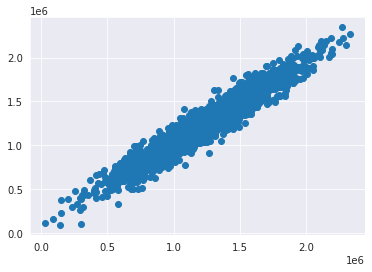

In [16]:
plt.scatter(x=y_test, y=predictions)

# Comparing the two values using a scatter plot. 
# If this comes roughly as a straight line then we can consider that our predictions are pretty good. 

**Create a distribution plot for the residuals.**

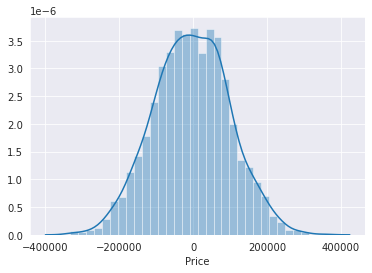

In [17]:
sns.distplot(y_test-predictions)

# The residual distplot seems to be a normal distribution which proves that the model chosen was the correct choice for the data available. 
# We can subtract an array from a Series

**Now it's time to evaluate the performance of the model using evaluation/performance metrics. Below are few of the popular evaluation metrics for Linear Regression Model.**

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Compute all the three errors.**

In [18]:
MAE = metrics.mean_absolute_error(y_test,predictions)
print("MAE is : {}$".format(MAE))
MSE = metrics.mean_squared_error(y_test,predictions)
print("MSE is : {}$^2".format(MSE))
RMSE = np.sqrt(MSE)
print("RMSE is : {}$".format(RMSE))

MAE is : 82288.22251914948$
MSE is : 10460958907.20906$^2
RMSE is : 102278.82922290938$
